In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
y_train.shape

(60000,)

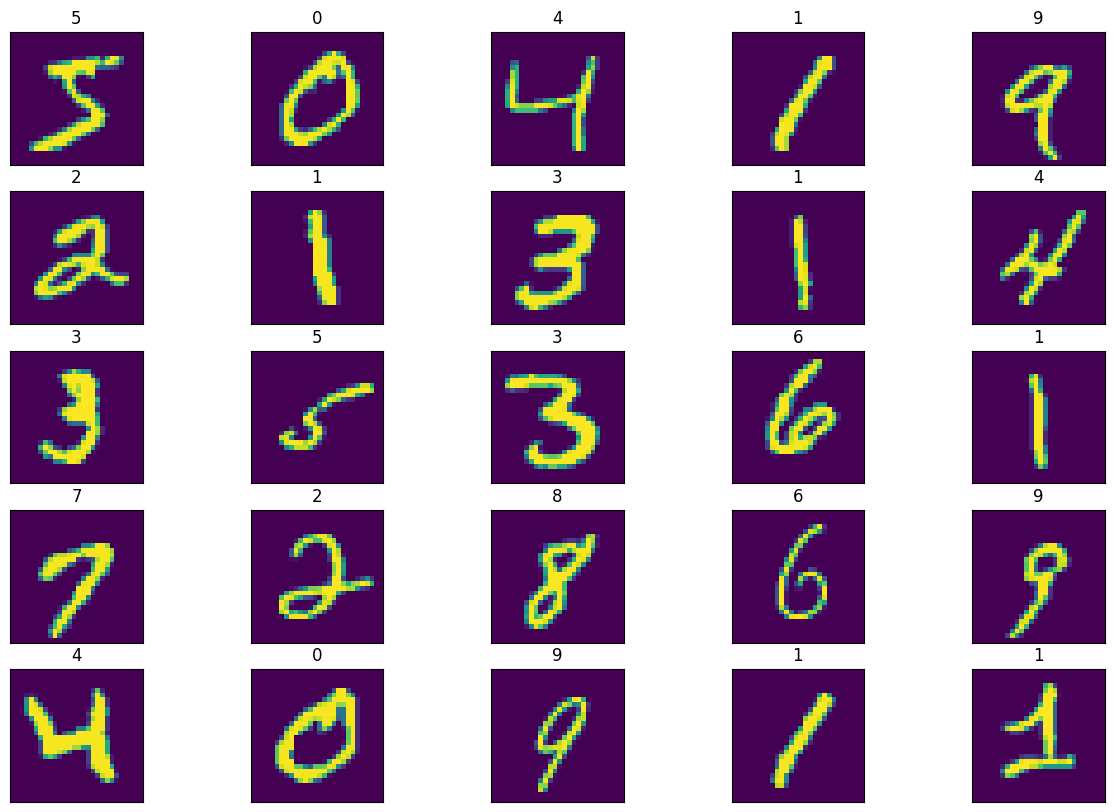

In [11]:
plt.figure(figsize=(15,10))

for i in range(25):

  row = 5
  plt.subplot(row, 25//row, i+1)
  plt.imshow(X_train[i])
  plt.title(y_train[i])
  plt.xticks([])
  plt.yticks([])

## Scale the data

In [12]:
X_train = X_train/255
X_test = X_test / 255

## Build Model

In [18]:
model = Sequential()
model.add(Conv2D(filters=32,input_shape=(28,28,1),activation='relu',kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16,activation='relu',kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

## Compiling the model

In [19]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Summary

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

## Train the model

In [21]:
history = model.fit(X_train, y_train,
                    validation_data = [X_test, y_test],
                    epochs = 10,
                    batch_size = 10,
                    verbose = 1)

Epoch 1/10
6000/6000 [==============================] - 28s 4ms/step - loss: 0.1210 - accuracy: 0.9623 - val_loss: 0.0519 - val_accuracy: 0.9823
Epoch 2/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0432 - accuracy: 0.9865 - val_loss: 0.0397 - val_accuracy: 0.9864
Epoch 3/10
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0310 - val_accuracy: 0.9888
Epoch 4/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0224 - accuracy: 0.9932 - val_loss: 0.0427 - val_accuracy: 0.9882
Epoch 5/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0297 - val_accuracy: 0.9908
Epoch 6/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0336 - val_accuracy: 0.9898
Epoch 7/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.0485 - val_ac

Evaluate on test data

In [24]:
model.evaluate(X_test,y_test,batch_size=1)

10000/10000 [==============================] - 27s 3ms/step - loss: 0.0484 - accuracy: 0.9905


[0.04838636890053749, 0.9904999732971191]

In [30]:
img  = X_test[600]
img=img.reshape(28,28)

In [31]:
img.shape

(28, 28)

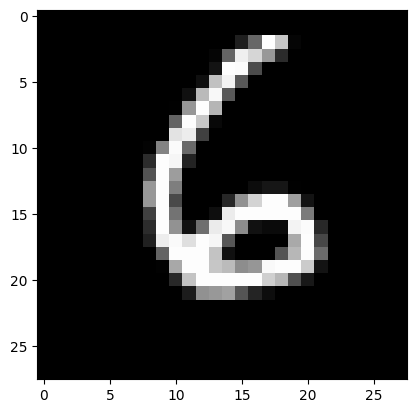

In [32]:
plt.imshow(img, cmap = 'gray')

In [35]:
np.argmax(model.predict(np.array([img])))

1/1 [==============================] - 0s 61ms/step


6

In [38]:
np.array([img]).shape

(1, 28, 28)